## 데이터 크롤링

In [107]:
pip install wordcloud konlpy matplotlib

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   --- ------------------------------------ 1.8/19.4 MB 9.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.9/19.4 MB 7.0 MB/s eta 0:00:03
   -------- ------------------------------- 4.2/19.4 MB 7.0 MB/s eta 0:00:03
   ----------- ---------------------------- 5.8/19.4 MB 6.9 MB/s eta 0:00:02
   --------------- ------------------------ 7.3/19.4 MB 7.2 MB/s eta 0:00:02
   ------------------ --------------------- 9.2/19.4 MB 7.2 MB/s eta 0:00:02
   ---------------------- ----------------- 11.0/19.4 MB 7.6 MB/s eta 0:00:02
   ------------------------- -------------- 12.6/19.4 MB 7.7 MB/s eta 0:00:01
   ----------------------------- ---------- 14.4/19.4 MB 7.7 MB/s eta 0:00:01
   -------------------------------- ------- 15.7/19.4 MB 7.5 MB/s eta 0:00:01
   ----------------------------------- ---- 17.3/19.4 MB 7.5 MB/s eta 0:00:01
   -------------------------------------- - 18.9/19.4 MB 7.5 MB/s eta 0:00:01


### 한국은행 기준금리 추이

In [64]:
dates = df.date.str.split(" ")

for date in dates:
    df[['year', 'month', 'day']] = df['date'].str.extract(r'(\d{4})년 (\d{1,2})월 (\d{1,2})일').astype(int)

df.rename(columns={'date': '변경일자', 'rate': '기준금리'}, inplace=True)
df = df.sort_values(by="year")


In [65]:
df.head(2)

,변경일자,기준금리,year,month,day
57,1999년 05월 06일,4.75,1999,5,6
55,2000년 10월 05일,5.25,2000,10,5


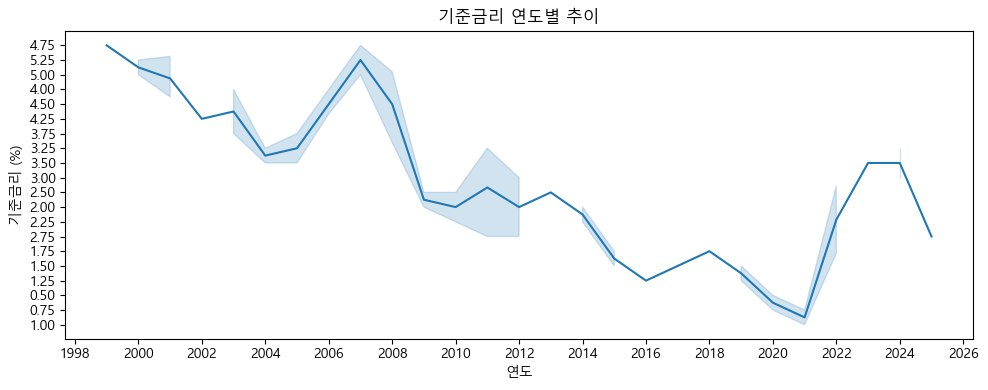

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rc('font', family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

# 기준금리 변화 시각화
plt.figure(figsize=(10, 4))
sns.lineplot(x="year", y="기준금리", data=df)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.title("기준금리 연도별 추이")
plt.xlabel("연도")
plt.ylabel("기준금리 (%)")
plt.tight_layout()
plt.show()


### 네이버 기사 타이틀

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
import pandas as pd

def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)

# 드라이버 실행
driver = webdriver.Chrome()
driver.get("https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=ai")

results = []
scroll_count = 0

while len(results) < 100:
    try : 
        ul = driver.find_element(By.CLASS_NAME, 'list_news')
        items = ul.find_elements(By.CSS_SELECTOR, 'a > span.sds-comps-text-type-headline1')

        for item in items:
            title = item.text
            if title and {'title': title} not in results:  # 중복 방지
                results.append({'title': title})
                if len(results) >= 100:
                    break

        scroll_down(driver)
        scroll_count += 1
        print(f"스크롤 {scroll_count}회 진행됨, 현재 수집 개수: {len(results)}")
    except NoSuchElementException:
        print("NoSuchElementException")

driver.quit()

# 데이터프레임 생성
df = pd.DataFrame(results, columns=['title'])
display(df)


스크롤 1회 진행됨, 현재 수집 개수: 10
스크롤 2회 진행됨, 현재 수집 개수: 18
스크롤 3회 진행됨, 현재 수집 개수: 28
스크롤 4회 진행됨, 현재 수집 개수: 38
스크롤 5회 진행됨, 현재 수집 개수: 48
스크롤 6회 진행됨, 현재 수집 개수: 58
스크롤 7회 진행됨, 현재 수집 개수: 68
스크롤 8회 진행됨, 현재 수집 개수: 78
스크롤 9회 진행됨, 현재 수집 개수: 88
스크롤 10회 진행됨, 현재 수집 개수: 98
스크롤 11회 진행됨, 현재 수집 개수: 100


,title
0,"산업부, 유통-AI 얼라이언스 출범…AI 생태계 활성화"
1,"KT-트랜스코스모스코리아, 기업 맞춤형 AI 고객센터 사업 협력"
2,‘양악수술 후 내 모습’ 미리 보여주는 AI 모델 개발
3,'2025 월드IT쇼' 韓 AI 기술 알린다…국내외 450개 기업 참가
4,"‘부정행위 AI’로 아마존 합격했던 21세 美 한인, 창업해 75억 투자 받..."
...,...
95,"플래티어, 월드IT쇼 참가…“AI·DX 기반 전문 솔루션 제시”"
96,"문체부, 관광벤처 사업 140개 선정…AI 기반 초개인화 관광이 대세"
97,"다이퀘스트·제주한라대, 글로벌 교육 AI 플랫폼 개발 함께 한다"
98,"오픈AI 챗GPT 책임자 ""구글 크롬 매각 명령되면 인수 의향"""


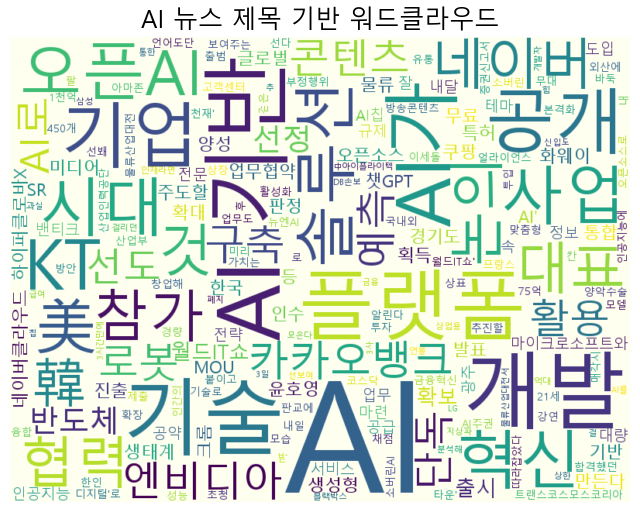

In [111]:
#워드 클라우드 그리기

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 제목 전체를 하나의 문자열로 결합
text = ' '.join(df['title'].tolist())

# 불용어 설정
stopwords = set(STOPWORDS)
# 필요한 경우 여기에 한국어 불용어도 추가 가능
stopwords.update(['기자', '뉴스', '보도'])  # 예시

# 워드클라우드 생성
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 시스템에 맞는 한글 폰트 경로
    background_color='ivory',
    stopwords=stopwords,
    width=800,
    height=600
)

# 워드클라우드 생성 (띄어쓰기 기반 자동 단어 분리)
cloud = wc.generate(text)

# 시각화
plt.figure(figsize=(8, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title("AI 뉴스 제목 기반 워드클라우드", fontsize=18)
plt.show()
